# Adversarial Examples

En este Notebook se exploran los ejemplos adversariales generados a partir de `Adversarial_generation.py`.

## Importaciones

In [1]:
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
from sklearn.metrics import confusion_matrix
# import seaborn as sns

## Cargar los datos de CIFAR10

In [2]:
# Data Preprocessing
testset = torchvision.datasets.CIFAR10(
    root='./data', train=False, download=True)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=128, shuffle=False, num_workers=2)

Files already downloaded and verified


## Cargar los Ejemplos adversariales

En la generación de ejemplos adversariales, para cada modelo, se generaron 4 tensores:
1. `'examples'`: Imagen con el ataque
2. `'real_labels'`: Label real de la imagen
3. `'model_labels'`: Label con la predicción del modelo antes del ataque
4. `'adversarial_labels'`: Label con la predicción del modelo después del modelo

In [3]:
adversarial_resnet = torch.load("./Adversarial_examples/FastGradient_Method/all_data_denormed_Resnet.pt")
adversarial_regnet_x = torch.load("./Adversarial_examples/FastGradient_Method/all_data_denormed_Regnet_X.pt")
adversarial_regnet_y = torch.load("./Adversarial_examples/FastGradient_Method/all_data_denormed_Regnet_Y.pt")
adver_data = {
    "Resnet": adversarial_resnet,
    "Regnet_X": adversarial_regnet_x,
    "Regnet_Y": adversarial_regnet_y
}

## Matriz de confusión antes y después del ataque adversarial

In [4]:
for key, adver in adver_data.items():
    cm = confusion_matrix(adver['real_labels'].tolist(), adver['model_labels'].tolist())
    cm_adver = confusion_matrix(adver['real_labels'].tolist(), adver['adversarial_labels'].tolist())
    fig, ax = plt.subplots(1, 2, figsize = (12, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax[0])
    ax[0].set_xticks(np.arange(len(testset.classes))+0.5, testset.classes, rotation = 45)
    ax[0].set_yticks(np.arange(len(testset.classes))+0.5, testset.classes, rotation = 45)
    ax[0].set_title('CM with test data')
    sns.heatmap(cm_adver, annot=True, fmt="d", cmap="Blues", ax=ax[1])
    ax[1].set_xticks(np.arange(len(testset.classes))+0.5, testset.classes, rotation = 45)
    ax[1].set_yticks(np.arange(len(testset.classes))+0.5, testset.classes, rotation = 45)
    ax[1].set_title('CM with adversarial examples')
    plt.suptitle(f'Model: {key}')
    plt.show()

KeyError: 'model_labels'

## Visualizando los ejemplos y los resultados del clasificador

Write a number 78


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


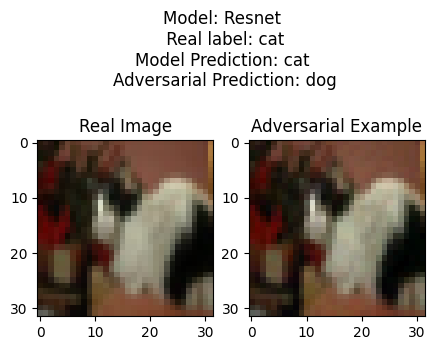

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


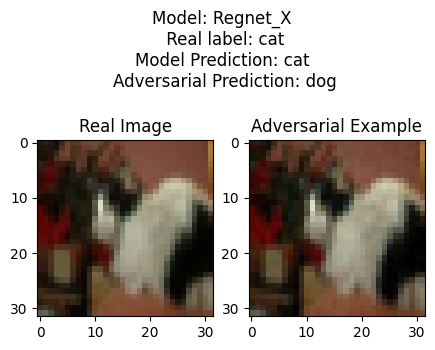

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


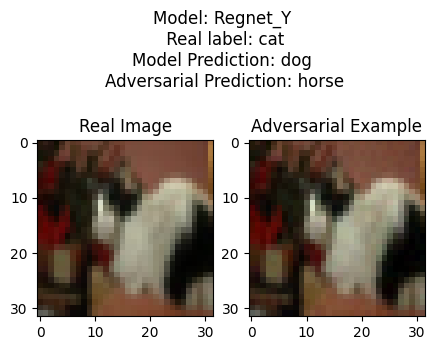

In [6]:
number = int(input('Write a number'))
for key, adver in adver_data.items():
    title = str(f"Model: {key} \n Real label: {testset.classes[adver['real_labels'][number]]} \n" + 
                f"Model Prediction: {testset.classes[adver['model_labels'][number]]} \n" +
                f"Adversarial Prediction: {testset.classes[adver['adversarial_labels'][number]]}")
    fig, ax = plt.subplots(1, 2, figsize = (5,4.5))
    ax[0].imshow(testset[number][0])
    ax[0].set_title("Real Image")
    ax[1].imshow(adver['examples'][number].numpy().transpose((1, 2, 0)))
    ax[1].set_title("Adversarial Example")
    plt.suptitle(title)
    plt.show()